<a href="https://colab.research.google.com/github/grovy04/myPython/blob/main/3%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D(%ED%8F%AC%EC%BC%93%EB%AA%AC%EC%8A%A4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####1교시 : 포켓몬 데이터를 분석해보자
캐글에 있는 포켓몬 데이터를 이용해서 데이터분석을 진행

-- 오늘 사용할 라이브러리 : Pandas, Matplotlib, WordCloud

    import Pandas as pd

-- 사용할 포켓몬 데이터 파일 : Pokemon.csv

변수명 | 의미
- | -
**#** | <center>포켓몬 Id number</center>
**Name** | <center>포켓몬의 이름</center>
**Type 1** | <center>첫 번째 속성</center>   
**Type 2** | <center>두 번째 속성</center>
**Total** | <center>전체 6가지 스탯의 총합</center>
**HP** | <center>포켓몬의 체력</center>
**Attack** | <center>물리공격력 (scratch, punch 등)</center>  
**Defense** | <center>물리공격에 대한 방어력</center>
**Sp. Atk** | <center>특수공격력 (fire blast, bubble beam 등)</center>  
**Sp. Def** | <center>특수공격에 대한 방어력.</center>
**Speed** | <center>포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정.<br>(더 높은 포켓몬이 먼저 공격한다)</center>  
**Generation** | <center>포켓몬의 세대. 현재 데이터에는 6세대까지 있다.</center>  
**Legendary** | <center>전설의 포켓몬 여부</center>  

    df = pd.read_csv('Pokemon.csv')

In [ ]:
#판다스 라이브러리 가져오기
import pandas as pd

In [ ]:
#데이터 파일 읽어오기
df = pd.read_csv('/content/Pokemon.csv')


In [ ]:
#데이터 프레임 크기 확인
#전체 데이터가 몇 개인지, 속성은 몇 개인지 확인
df.shape

(800, 13)

In [ ]:
#가져온 데이터의 맨 위 n개 데이터 보기
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
#가져온 데이터의 맨 아래 n개 데이터 보기
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


-- 데이터 프레임에서 필요없는 컬럼 삭제하기

-- 삭제했다고 데이터프레임에서 없어지는 것은 아님

-- 삭제한 상태의 데이터프레임으로 replace할 것

```
df.drop(columns = ['컬럼명'])
```

In [ ]:
#불필요하다고 판단한 속성 삭제하기
df.drop(columns=['#'])
df.head()

#다른 데이터 프레임 만들어서 속성이 삭제된 데이터 저장하기
df1 = df.drop(columns = ['#'])
df1.head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


-- 결측치 확인하고, 있으면 삭제
```
pkemon.isnull()
```
-- NaN은 ' '로 대체

-- source 제공-지우지 마세요


In [ ]:
import numpy as np
df1.info()
df1['Type 2'] = df['Type 2'].replace(np.nan, ' ')
df1.dropna(inplace=True)
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

--
데이터프레임의 특정 컬럼의 데이터 갯수
```
df1['컬럼명'].value_counts()
```

In [ ]:
#포켓몬스터의 종류는? 가장 흔한 타입 또는 가장 희귀한 타입은?

df1['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [ ]:
df1['Type 2'].value_counts()

            386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [ ]:
#배포본에서는 지울 것
#각 컬럼(속성)의 값
df1['Type 1']  #시리즈 보여줄 것
df1['Type 1'] == 'Flying'  #시리즈 중에서 값이 Flying인 것만 True/False로 값을 보여줌
#df1[] 데이터 중에서 df1['Type 1'] == 'Flying'인 데이터만 가져옴
df1[df1['Type 1'] == 'Flying']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
702,TornadusIncarnate Forme,Flying,,580,79,115,70,125,80,111,5,True
703,TornadusTherian Forme,Flying,,580,79,100,80,110,90,121,5,True
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False


In [ ]:
#가장 희귀한 타입의 포켓몬스터는 누굴까?
df1[df1['Type 1'] == 'Flying']

#가장 흔한 타입의 포켓몬스터는 누굴까?
df1[df1['Type 1'] == 'Water']

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,Squirtle,Water,,314,44,48,65,50,64,43,1,False
10,Wartortle,Water,,405,59,63,80,65,80,58,1,False
11,Blastoise,Water,,530,79,83,100,85,105,78,1,False
12,BlastoiseMega Blastoise,Water,,630,79,103,120,135,115,78,1,False
59,Psyduck,Water,,320,50,52,48,65,50,55,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
724,Froakie,Water,,314,41,56,40,62,44,71,6,False
725,Frogadier,Water,,405,54,63,52,83,56,97,6,False
726,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
762,Clauncher,Water,,330,50,53,62,58,63,44,6,False


-- 가장 힘이 쎈 몬스터는 누구일까?

```
max(df1['컬럼명'])
df1[df1['컬럼명'] == max(df1['컬럼명'])]
```

In [ ]:
#특정 컬럼에서 가장 큰 값 가져오기

max(df1['HP'])

255

In [ ]:
#가장 힘이 쎈 포켓몬스터는 누구일까?

df1[df1['HP'] == max(df1['HP'])]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,,540,255,10,10,75,135,55,2,False


In [ ]:
df['HP'] == max(df1['HP'])

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: HP, Length: 800, dtype: bool

미션.1 전설의 포켓몬은 어떤 것이 있을까?

In [ ]:
df4 = df1[df1['Legendary'] == True]
df4['Type 1'].value_counts()

Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Rock         4
Steel        4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: Type 1, dtype: int64

-- 포켓몬스터 타입별 시각화

-- 사용할 라이브러리 : Matplotlib
```
import matplotlib as plt
```

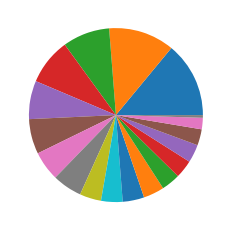

In [ ]:
import matplotlib.pyplot as plt

df2 = df1['Type 1'].value_counts()
plt.pie(df2)
plt.show()

이름을 붙이기 위해서 필요한 것

-- index - df2.index

-- labels - plt.pie(df2, labels=df2.index)
```
df2.index
````

In [ ]:
print(df2.index)
len(df2.index)

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric',
       'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel',
       'Fighting', 'Ice', 'Fairy', 'Flying'],
      dtype='object')


18

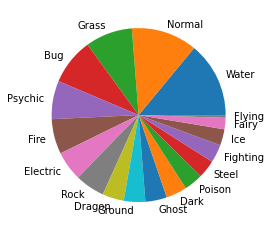

In [ ]:
import matplotlib.pyplot as plt

df2 = df1['Type 1'].value_counts()
plt.pie(df2, labels=df2.index)
plt.show()

In [ ]:
#explode 옵션 추가하기 -  튀어나와 있는 듯한 모양
len(df2.index)

18

In [ ]:
#explode 옵션 추가하기3
#특정 타입의 정확한 위치 확인을 위해
df2.index

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric',
       'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel',
       'Fighting', 'Ice', 'Fairy', 'Flying'],
      dtype='object')

In [ ]:
#explode 옵션 추가하기3
#위 코드셀과 같음, 둘 중에 하나 선택
list_ex = [0.2, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1,
           0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

explode 옵션 추가하기

list_ex = [0.2, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1,
           0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

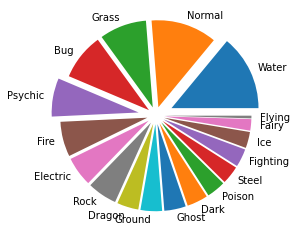

In [ ]:
import matplotlib.pyplot as plt

df2 = df1['Type 1'].value_counts()
plt.pie(df2, labels=df2.index, explode=list_ex)
plt.show()

백분율 표시하기
크기 조절하기
그래프 타이틀 만들기
```
plt.pie(df2, labels=df2.index, explode=list_ex, autopct='%.1f%%')
```

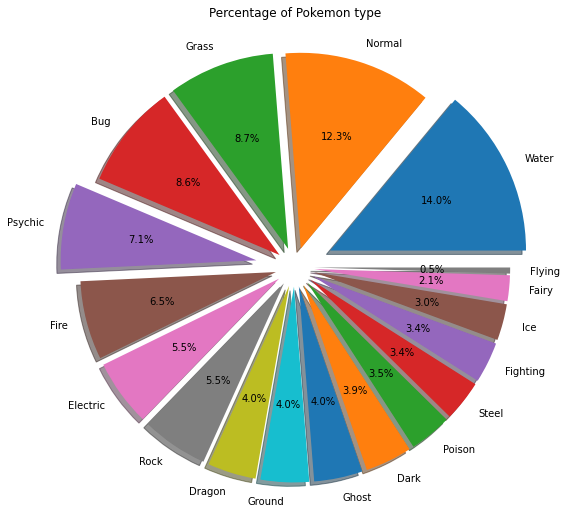

In [ ]:
#그래프 크기 키우기
#shadow 옵션 적용해서 입체감 주기
#그래프 제목 추가하기
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))

df2 = df1['Type 1'].value_counts()
plt.title('Percentage of Pokemon type')
plt.pie(df2,
        labels=df2.index,
        explode=list_ex,
        autopct='%.1f%%',
        shadow=True)
plt.show()

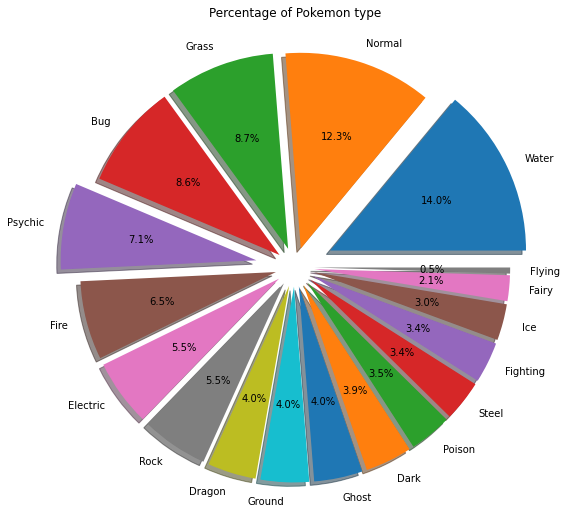

In [ ]:
#배포용

import matplotlib.pyplot as plt

#explode 옵션 추가하기3
list_ex = [0.2, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1,
           0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

plt.figure(figsize=(9, 9))

df2 = df1['Type 1'].value_counts()
plt.title('Percentage of Pokemon type')
plt.pie(df2,
        labels=df2.index,
        explode=list_ex,
        autopct='%.1f%%',
        shadow=True)
plt.show()


워드클라우드 만들기
1. 사용라이브러리
    - WordCloud
    - numpy
    - PIL


In [ ]:
from wordcloud import WordCloud
import numpy as np
import PIL

#Type 1 컬럼을 딕셔너리 형태로 저장한다
dict_data = df1['Type 1'].value_counts()
print(dict_data)

#저장할 이미지 파일을 불러와 numpy 배열 형태로 변환한다
img = PIL.Image.open('/content/up.png')
img_array = np.array(img)

wc = WordCloud(background_color='white', mask= img_array)
wc = wc.generate_from_frequencies(dict_data)

#워드클라우드 형태로 만들어진 데이터를 파일로 저장한다
wc.to_file('/content/wc_up.png')

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt -qq -y install fonts-nanum                             # 한글 폰트 설치
# 해당 폰트가 기본 폰트가 되도록 설정
import matplotlib.font_manager as fm                        # 한글 폰트 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 9)
plt.rc('font', family = 'NanumBarunGothic')                 # 코랩의 한글 폰트를 '나눔바른고딕'으로 설정
mpl.font_manager._rebuild( )

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [ ]:
#미션.2

from wordcloud import WordCloud
import numpy as np
import PIL
from collections import Counter

fp = open('/content/아기상어.txt', 'r', encoding='utf-8')

lines = []

for line in fp.readlines():
  if len(line) > 0:
      lines.append(line.replace('\n',' '))

dict_data = Counter(lines)

img = PIL.Image.open('/content/up.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumGothic.ttf', background_color='white', mask= img_array)
wc = wc.generate_from_frequencies(dict_data)
wc.to_file('/content/wc_상어.png')